In [53]:
import numpy as np
import copy # for copying internal variables in lists
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import parameters_MF_MB as PRM
import simulations_MF_MB as SIM
import analyzes_MF_MB as ALY
import figures_indiv as GRAPH_i
import figures_pop as GRAPH_p
import figure_qvalue_map as GRAPH_Qmap
import figures_final as GRAPH

# Reloading modules automatically :
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Learning curves

/home/esther/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


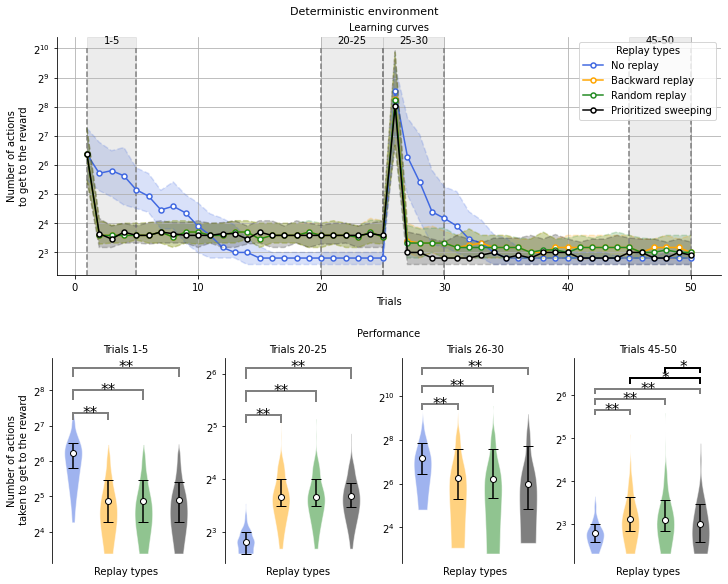

In [54]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]

GRAPH.figure_learning_curves_violin_plots(det=True, params=params, log=True)

/home/esther/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


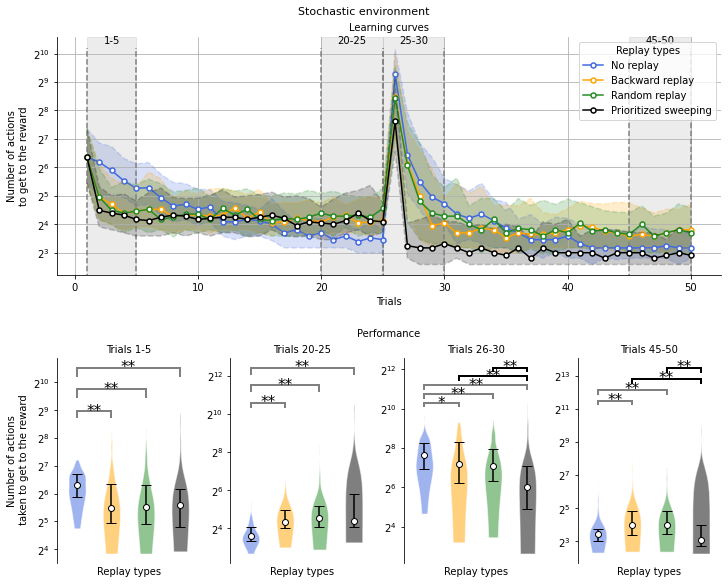

In [55]:
GRAPH.figure_learning_curves_violin_plots(det=False, params=params, log=True)

# Selection of the learning rate

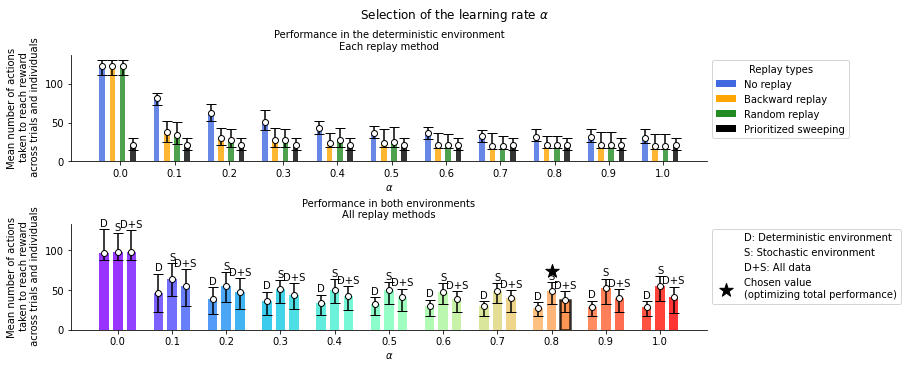

In [56]:
GRAPH.figure_alpha_selection(params=params)

# Q values propagation

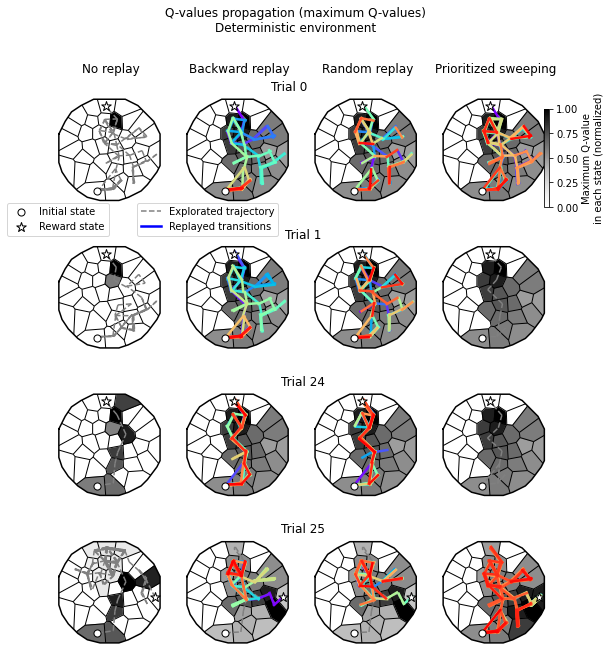

In [57]:
GRAPH.figure_Qvalues(det=True, params=params)
#  trials=[0,1]

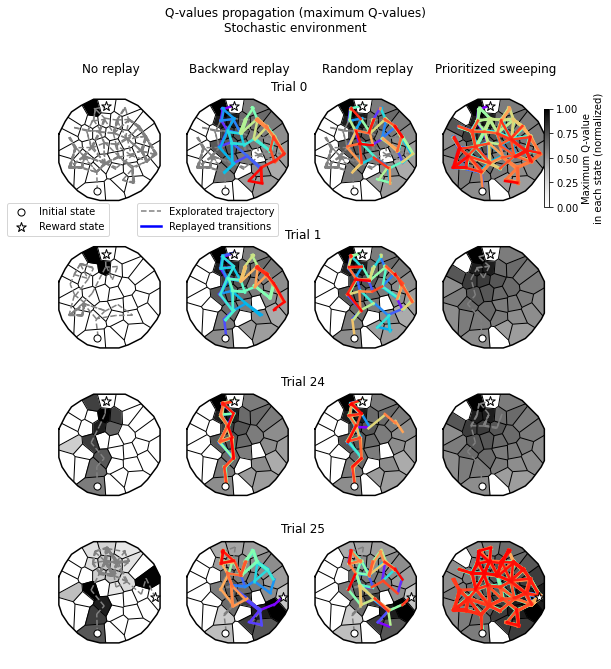

In [59]:
GRAPH.figure_Qvalues(det=False, params=params)
#  trials=[0,1]

# Histograms

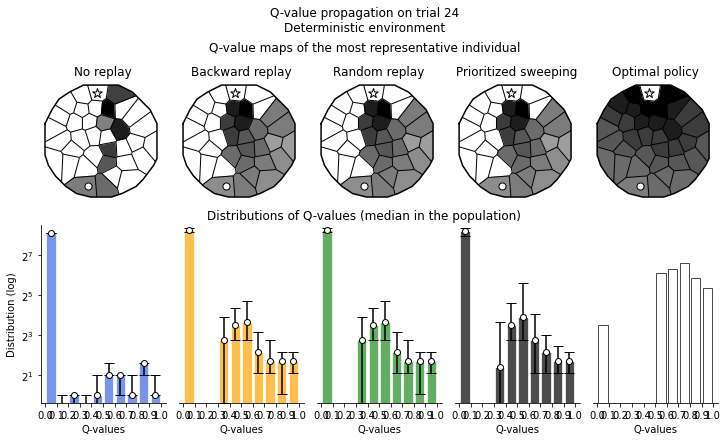

In [45]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
GRAPH.figure_histograms(trial=24, det=True, params=params)

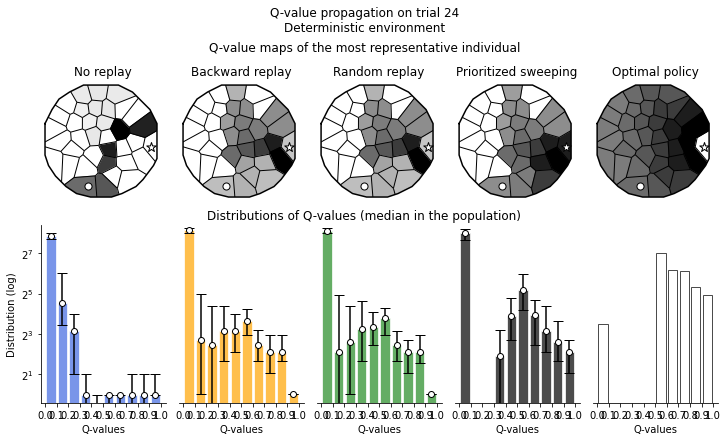

In [44]:
params['replay_refs'] = [0,1,2,4]
GRAPH.figure_histograms(trial=25, det=True, params=params)

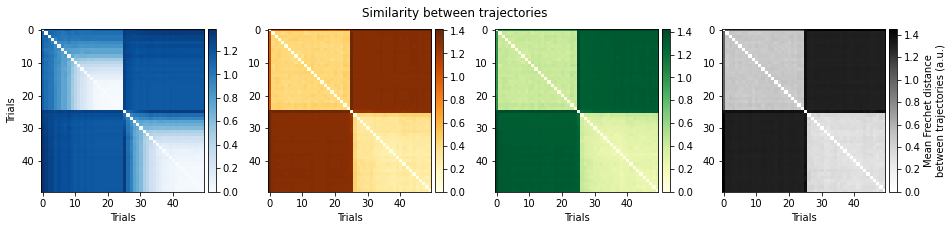

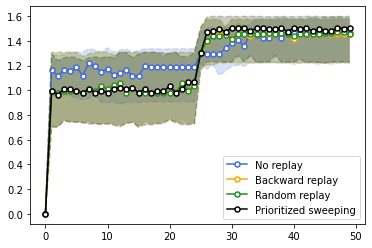

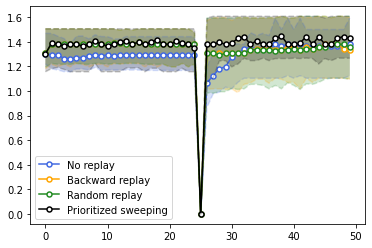

In [121]:
params['replay_refs'] = [0,1,2,4]
GRAPH_p.compare_distances_trajectories(deterministic=True, params=params)
GRAPH_p.compare_distances_initial_trajectory(trial=0, deterministic=True, params=params)
GRAPH_p.compare_distances_initial_trajectory(trial=25, deterministic=True, params=params)

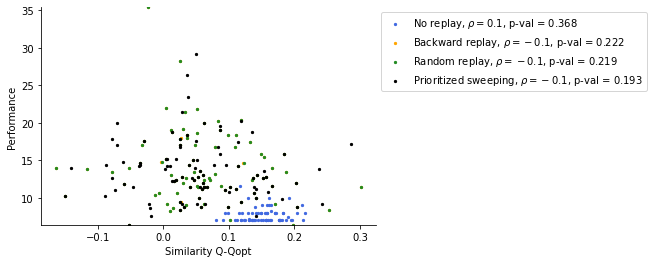

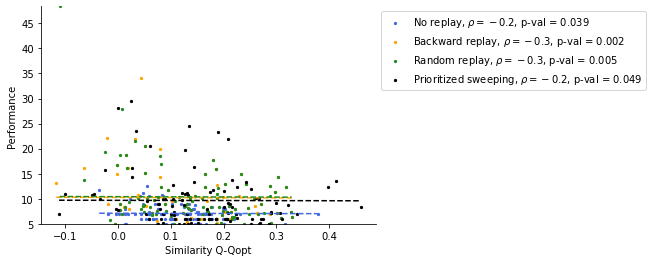

In [140]:
params = copy.deepcopy(PRM.params)
params['replay_refs'] = [0,1,2,4]
env = '_D'
PRFl0_5l = SIM.recover_data('PRFl0_5l'+env)
PRFl1_5l = SIM.recover_data('PRFl1_5l'+env)
prfsl0 = GRAPH_p.create_groups_perfs(PRFl0_5l, 'Mean', params=params)
prfsl1 = GRAPH_p.create_groups_perfs(PRFl1_5l, 'Mean', params=params)
Qpop24 = SIM.recover_data('Qpop24'+env, df=False)
Qpop25 = SIM.recover_data('Qpop25'+env, df=False)
Qoptl0 = SIM.recover_data('Qoptl0'+env, df=False)
Qoptl1 = SIM.recover_data('Qoptl1'+env, df=False)


corrQ24 = ALY.all_correlations(Qpop24, Qoptl0, params=params)
GRAPH_p.plot_correlations(corrQ24, prfsl0, params=params, label0='Similarity Q-Qopt', label1='Performance', title='')
corrQ25 = ALY.all_correlations(Qpop25, Qoptl1, params=params)
GRAPH_p.plot_correlations(corrQ25, prfsl1, params=params, label0='Similarity Q-Qopt', label1='Performance', title='')

In [127]:
Tr_div0 = ALY.all_transitions_diversity(trial=0, params=params)
Tr_div25 = ALY.all_transitions_diversity(trial=25, params=params)

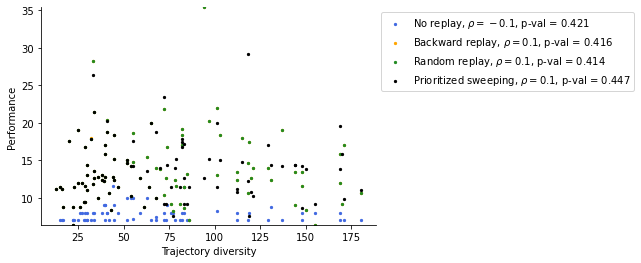

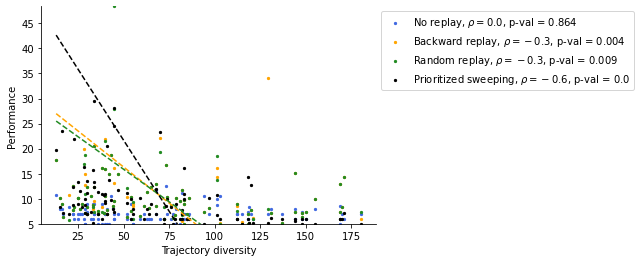

In [139]:
GRAPH_p.plot_correlations(Tr_div0, prfsl0, params=params, label0='Trajectory diversity', label1='Performance', title='')
GRAPH_p.plot_correlations(Tr_div0, prfsl1, params=params, label0='Trajectory diversity', label1='Performance', title='')

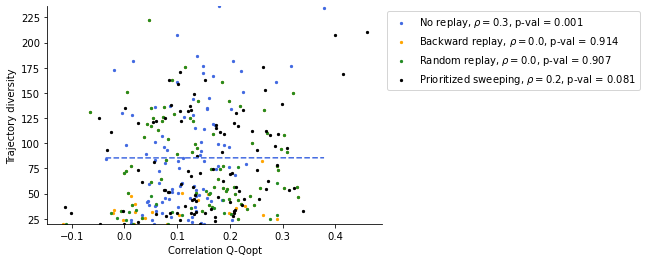

In [143]:
GRAPH_p.plot_correlations(corrQ25, Tr_div25, params=params, label0='Correlation Q-Qopt', label1='Trajectory diversity', title='')